## Observations and Insights

## Dependencies and starter code

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data=mouse_metadata.merge(study_results, on='Mouse ID', how='outer')

## Summary statistics

In [82]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_data.head()

summary_table = pd.DataFrame({
    'Mean':merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.mean),
    'Median':merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.median),
    'Variance':merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.var),
    'Standard dev':merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(np.std),
    'SEM':merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(st.sem)})

su = summary_table
su

su=su.reset_index()

## Bar plots

Text(0.5, 1.0, 'Drug Regimen vs Tumor Volume (mm3)')

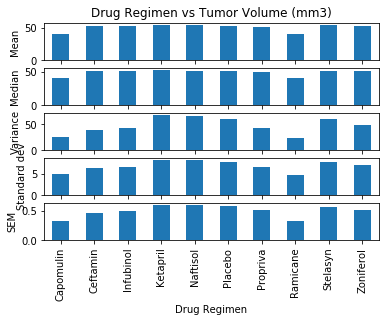

In [95]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

su1=su[['Drug Regimen','Mean']]
su2=su[['Drug Regimen','Median']]
su3=su[['Drug Regimen','Variance']]
su4=su[['Drug Regimen','Standard dev']]
su5=su[['Drug Regimen','SEM']]

fig,(axis1,axis2,axis3,axis4,axis5)=plt.subplots(5)

su1.plot(kind='bar',ax=axis1, legend=False)
su2.plot(kind='bar',ax=axis2, legend=False)
su3.plot(kind='bar',ax=axis3, legend=False)
su4.plot(kind='bar',ax=axis4, legend=False)
su5.plot(kind='bar',ax=axis5, legend=False)

axis1.set_ylabel('Mean')
axis2.set_ylabel('Median')
axis3.set_ylabel('Variance')
axis4.set_ylabel('Standard dev')
axis5.set_ylabel('SEM')
axis5.set_xlabel('Drug Regimen')

axis5.set_xticklabels(su['Drug Regimen'])
axis1.set_title('Drug Regimen vs Tumor Volume (mm3)')

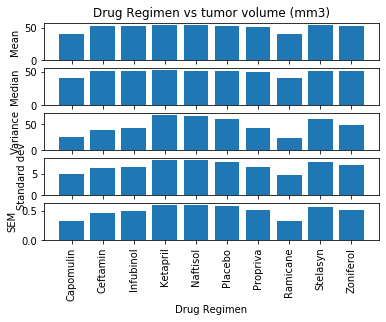

In [94]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

ivar=su["Drug Regimen"]

fig,(axis1,axis2,axis3,axis4,axis5)=plt.subplots(5)
axis1.bar(ivar,su["Mean"])
axis2.bar(ivar,su["Median"])
axis3.bar(ivar,su["Variance"])
axis4.bar(ivar,su["Standard dev"])
axis5.bar(ivar,su["SEM"])

plt.xticks(ivar,rotation=90)
axis5.set_xlabel("Drug Regimen")
axis1.set_ylabel("Mean")
axis2.set_ylabel("Median")
axis3.set_ylabel("Variance")
axis4.set_ylabel("Standard dev")
axis5.set_ylabel("SEM")
axis1.set_title("Drug Regimen vs tumor volume (mm3)")

plt.show()

## Pie plots

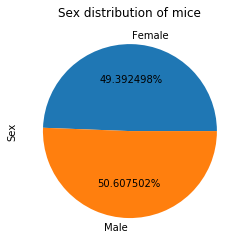

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data=merged_data.groupby("Sex").Sex.count()
labels=data.keys()

data.plot(kind="pie", labels=labels,autopct="%f%%", title="Sex distribution of mice")

Text(0.5, 1.0, 'Sex distribution of mice')

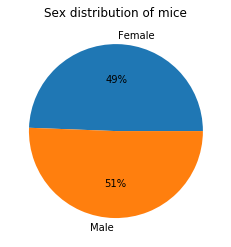

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data=merged_data.groupby("Sex").Sex.count()
labels=data.keys()

plt.pie(data,labels=labels,autopct="%1.0f%%")
plt.title("Sex distribution of mice")

## Quartiles, outliers and boxplots

In [143]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outlier
boxplot=merged_data[['Drug Regimen','Tumor Volume (mm3)']].loc[
    (merged_data['Drug Regimen']=='Capomulin')|(merged_data['Drug Regimen']=='Ramicane')| 
    (merged_data['Drug Regimen']=='Infubinol')|(merged_data['Drug Regimen']=='Ceftamin')]

#split into 0.1,0.25,0.5,0.75 quartiles
quantile_100=boxplot.groupby('Drug Regimen').quantile(0.1)
quantile_25=boxplot.groupby('Drug Regimen').quantile(0.25)
quantile_50=boxplot.groupby('Drug Regimen').quantile(0.50)
quantile_75=boxplot.groupby('Drug Regimen').quantile(0.75)
min_volume=boxplot.groupby('Drug Regimen').min()
max_volume=boxplot.groupby('Drug Regimen').max()

lowerq=quantile_25
upperq=quantile_75
iqr=upperq-lowerq

lower_bound=lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)

print(f'lower quartile {lowerq}\n')
print(f'upper quartile {upperq}\n')
print(f'center range {iqr}\n')
print(f'median {quantile_50}\n ')
print(f'lower bound {lower_bound}\n')
print(f'upper bound {upper_bound}\n\n')

check=(min_volume-lower_bound).sum()+(max_volume-upper_bound).sum()
if abs(check[0])>0:
    print('Outliers exist within our dataset') 

lower quartile               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              37.685933
Ceftamin               47.208427
Infubinol              47.312353
Ramicane               36.674635

upper quartile               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              45.000000
Ceftamin               56.801438
Infubinol              57.314444
Ramicane               45.000000

center range               Tumor Volume (mm3)
Drug Regimen                    
Capomulin               7.314067
Ceftamin                9.593010
Infubinol              10.002091
Ramicane                8.325365

median               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              41.557809
Ceftamin               51.776157
Infubinol              51.820584
Ramicane               40.673236
 
lower bound               Tumor Volume (mm3)
Drug Regimen                    
Capomulin              26.714832
Ceftamin               32.818911
Infubinol

[Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Ceftamin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Ramicane')]

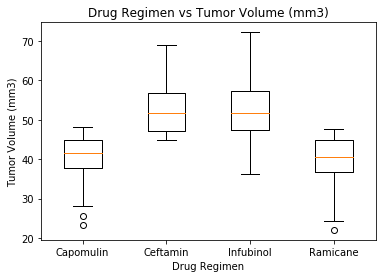

In [162]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug1=boxplot['Tumor Volume (mm3)'].loc[(merged_data['Drug Regimen']=='Capomulin')]
drug2=boxplot['Tumor Volume (mm3)'].loc[(merged_data['Drug Regimen']=='Ceftamin')]
drug3=boxplot['Tumor Volume (mm3)'].loc[(merged_data['Drug Regimen']=='Infubinol')]
drug4=boxplot['Tumor Volume (mm3)'].loc[(merged_data['Drug Regimen']=='Ramicane')]
drugs_data = [drug1, drug2, drug3, drug4]

fig = plt.figure()
ax = fig.add_subplot()
drugs_boxplot = ax.boxplot(drugs_data)

ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Drug Regimen vs Tumor Volume (mm3)')
ax.set_xticklabels(['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane'])

## Line and scatter plots

Text(0.5, 1.0, 'Time vs Tumor Volume')

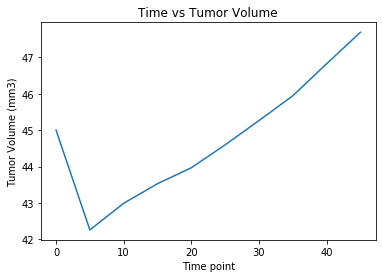

In [167]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse='i557'
time_vs_tumor=merged_data[['Timepoint','Tumor Volume (mm3)']].loc[
    (merged_data['Drug Regimen']=='Capomulin') & (merged_data['Mouse ID']==mouse)]

plt.plot(time_vs_tumor["Timepoint"],time_vs_tumor["Tumor Volume (mm3)"])

plt.xlabel('Time point')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Time vs Tumor Volume')

Text(0.5, 1.0, 'Mouse Weight (g) vs Avg Tumor Volume (mm3)')

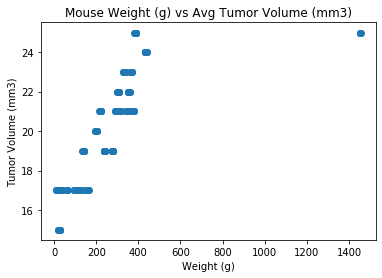

In [180]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

tumorweight=merged_data[['Weight (g)','Tumor Volume (mm3)']].loc[
    (merged_data['Drug Regimen']=='Capomulin')]
tumorweight=tumorweight.groupby('Weight (g)').mean()
tumorweight=pd.DataFrame(weight_vs_avgtumor).reset_index()

x=tumorweight.iloc[:,0]
y=tumorweight.iloc[:,1]

plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight (g) vs Avg Tumor Volume (mm3)')

Text(0.5, 1.0, 'Mouse Weight (g) vs Avg Tumor Volume (mm3)')

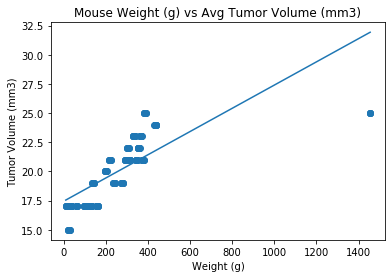

In [191]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#slope intercept form
(slope,a_int,r,p,std_err)=st.linregress(x,y)
fx=slope*x+a_int
fx

plt.scatter(x,y)
plt.plot(x,fx,'-')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse Weight (g) vs Avg Tumor Volume (mm3)')
